# Implementation of Gradient Monte Carlo Algorithm on MountainCar

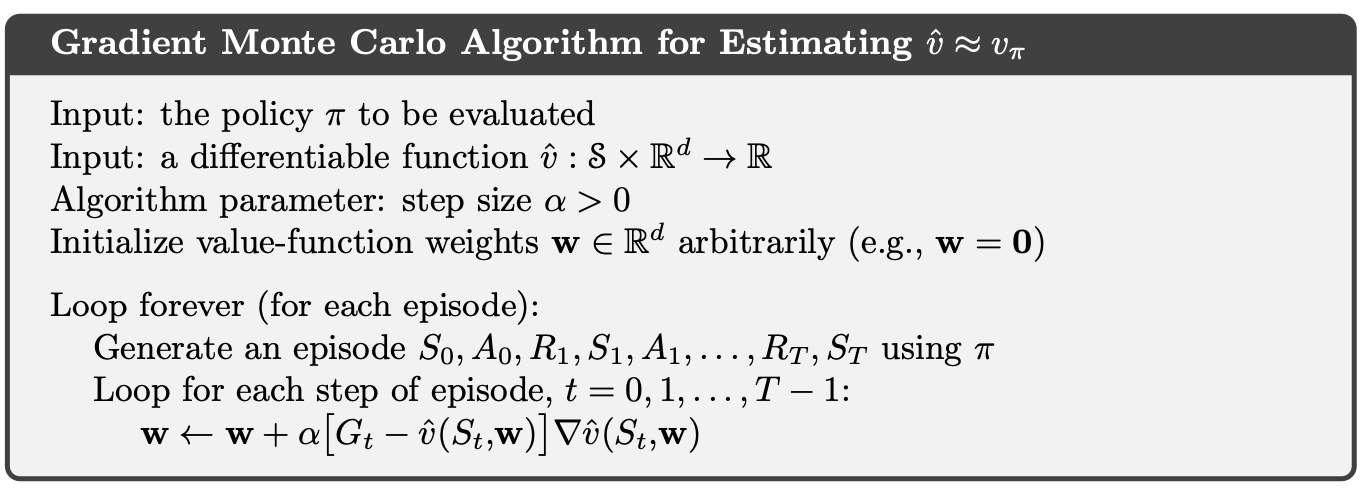

In [51]:
import gym
import numpy as np

# Function to do the episilon greedy action
def epsilonGreedy(epsilon, weights, state, env):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        # valueFunction = v_hat(weights, state)
        qValues = []
        for action in range(env.action_space.n):
            print(weights[action])
            print(state)
        action = np.argmax(qValues)
    return action

# Function For V_Hat
def v_hat(weights, state):
    return np.dot(weights, np.array(state))

# Parameters
env = gym.make("MountainCar-v0", render_mode="human")
nFeatures = env.observation_space.shape[0]
nActions = env.action_space.n 
alpha = 0.1
epsilon = 0.1
gamma = 0.1
maxEpisodes = 100

# Initialization
weights = np.zeros(nFeatures)

# Looping Forever
for episode in range(maxEpisodes):
    initialState, _ = env.reset()
    done = False
    currentEpisode = 0
    episode = []
    while not done:
        action = epsilonGreedy(epsilon=epsilon, weights=weights, state=initialState, env=env)
        nextState, reward, done, _, _ = env.step(action)

        episode.append([initialState, action, reward]) # Inital State, Action, Reward
        initialState = nextState
        currentEpisode += 1
    
    # Q-Learning From Samples In Model
    G = 0
    for t in reversed(range(currentEpisode)):
        state, action, reward = episode[t]
        G = gamma * G + reward
        weights = weights + alpha * (G - v_hat(weights, state)) * np.array(state)

0.0
[-0.5536319  0.       ]
0.0
[-0.5536319  0.       ]


IndexError: index 2 is out of bounds for axis 0 with size 2